# Visualization of some parameters in diffusion model

In [1]:
import torch
from torch import Tensor
from torch.func import jacfwd, vmap  # , vjp
from torch.autograd.functional import vjp
import math
import matplotlib.pyplot as plt
import numpy as np
import torch.nn as nn
import torch.nn.functional as F
from loguru import logger

## The beta, sigma, alpha

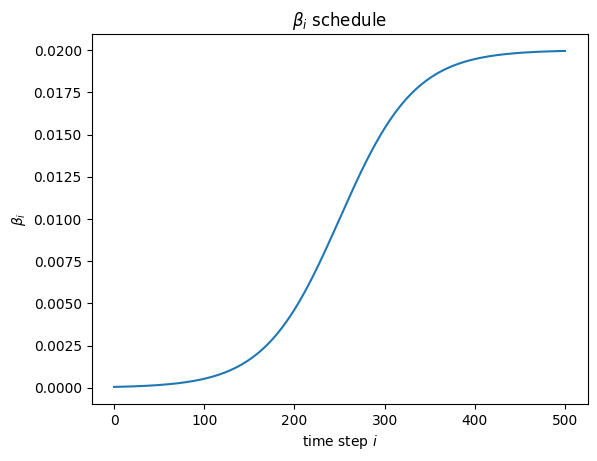

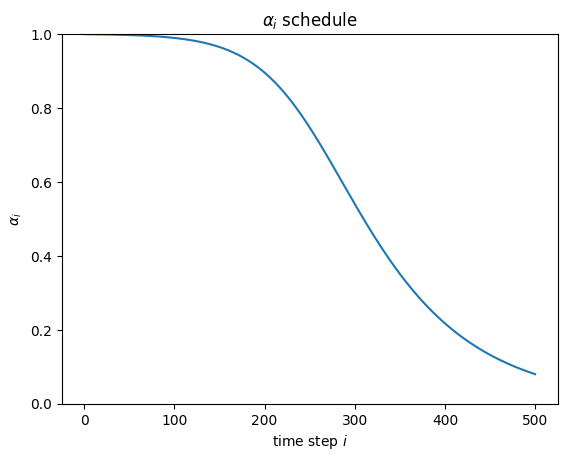

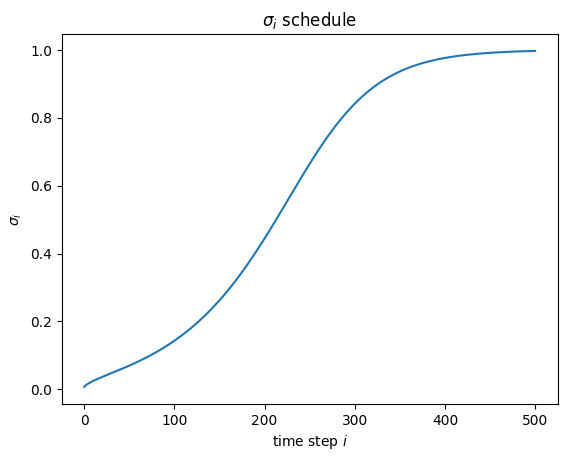

In [17]:
from molbd.util import get_alpha_i, get_beta_i, get_sigma_i

beta_i = get_beta_i(500)
plt.title(r"$\beta_i$ schedule")
plt.plot(beta_i)
plt.ylabel(r"$\beta_i$")
plt.xlabel("time step $i$")
plt.show()

alpha_i = get_alpha_i(beta_i)
plt.title(r"$\alpha_i$ schedule")
plt.plot(alpha_i)
plt.ylabel(r"$\alpha_i$")
plt.xlabel("time step $i$")
plt.ylim(0,1.0)
plt.show()


sigma_i = get_sigma_i(alpha_i)
plt.title(r"$\sigma_i$ schedule")
plt.plot(sigma_i)
plt.ylabel(r"$\sigma_i$")
plt.xlabel("time step $i$")
plt.show()

## Time encoding

In [18]:
from molbd.molecule.transformer import SinusoidalPositionEmbeddings

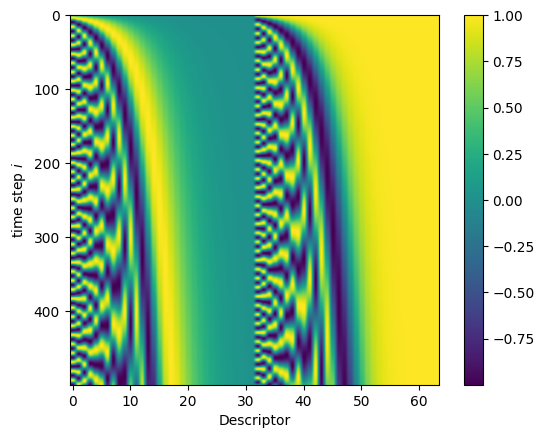

In [23]:
spe = SinusoidalPositionEmbeddings(dim=64)
time = torch.linspace(0, 1, 500)
emb = spe(time).numpy()
plt.imshow(emb, aspect=64 / len(time))
plt.xlabel("Descriptor")
plt.ylabel("time step $i$")
plt.colorbar()
plt.show()

In [24]:
from molbd.twodim import time_descriptor

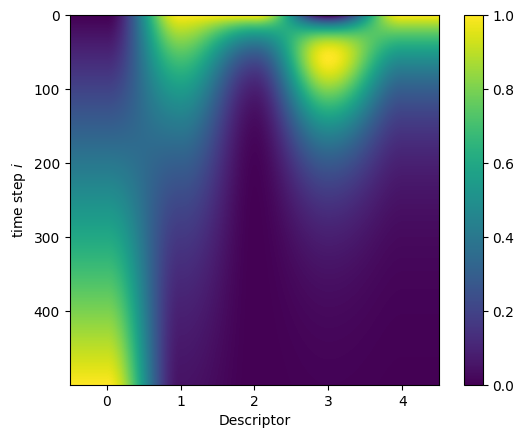

In [28]:
time = torch.linspace(0, 1, 500)
emb = time_descriptor(time, 5).numpy()
plt.imshow(emb, aspect=5 / len(time))
plt.xlabel("Descriptor")
plt.ylabel("time step $i$")
plt.colorbar()
plt.show()